In [237]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score


In [3]:
data= pd.read_csv("/home/anjali/06/datasets/features.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.keys()

Index(['Unnamed: 0', 'seq', 'aindex', 'autocovariance', 'autocorrelation',
       'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6',
       'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'boman', 'charge',
       'crosscovariance', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5',
       'F6', 'hmoment', 'hydrophobicity', 'instaindex', 'KF1', 'KF2', 'KF3',
       'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'lengthpep',
       'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'mw', 'pI', 'ProtFP1', 'ProtFP2',
       'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST1',
       'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'T1', 'T2', 'T3', 'T4',
       'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7',
       'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'column_tiny_number',
       'column_tiny_percentage', 'column_Small_number',
       'column_Small_percentage', 'column_Aliphatic_number',
       'column_Aliphatic_percentage', 'column_Aromatic_number'

In [347]:
apd3_data= pd.read_csv("/home/anjali/06/datasets/apd3.csv")
lamp_data= pd.read_csv("/home/anjali/06/datasets/avppred.csv")

# list_apd3= [(apd3_data.aindex,apd3_data.autocovariance)] 
# list_lamp= [(lamp_data.aindex, lamp_data.autocovariance)]

# list_combine= list_apd3
# list_combine.append(list_lamp)
# print(type(list_combine))
# print(type(list_apd3))
# print(type(list_lamp))

# list_combine
type(apd3_data)

pandas.core.frame.DataFrame

In [455]:
# apd3_list= apd3_data[["MSWHIM1", "aindex"]]
# lamp_list= lamp_data[["MSWHIM1", "aindex"]]

# list_combine= apd3_list
# list_combine.append(lamp_list)

list_combine= apd3_data
list_combine.append(lamp_data)

# cols= [item for item in list(list_combine.keys()) if item not in ("Unnamed: 0", "seq", "ID", "Unnamed: 98", "pepClass", "Subclass", 'Database', "Reference")]
# print(cols)
cols= ["aindex", "autocorrelation", "PP1", "column_Aliphatic_percentage"]
# cols= ["column_Aliphatic_number", "column_Aliphatic_percentage"]

list_combine= list_combine[cols]


list_combine

,aindex,autocorrelation,PP1,column_Aliphatic_percentage
0,95.15152,-0.088325,-0.379394,51.515
1,40.00000,-0.237574,-0.298529,11.765
2,27.03704,-0.117148,-0.037963,11.111
3,22.04082,-0.088038,0.055102,10.204
4,117.64710,-0.058436,-0.267059,41.176
5,59.44444,0.101648,-0.156667,16.667
6,59.44444,0.122030,-0.154444,16.667
7,170.00000,-0.021750,-0.306667,50.000
8,54.41860,-0.302447,-0.471395,13.953
9,58.50000,-0.017756,-0.375500,15.000


In [436]:
list_combine1= apd3_data
list_combine1.append(lamp_data) 

cols1= [item for item in list(list_combine1.keys()) if item not in ("Unnamed: 98","pepClassSubclass","Database","Reference", "pepClass", "Subclass", "ID", "seq")]
list_combine1= list_combine1[cols1]
list_combine1

,aindex,autocovariance,autocorrelation,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,column_NonPolar_number,column_NonPolar_percentage,column_Polar_number,column_Polar_percentage,column_Charged_number,column_Charged_percentage,column_Basic_number,column_Basic_percentage,column_Acidic_number,column_Acidic_percentage
0,95.15152,-0.078216,-0.088325,0.242121,-0.428788,0.107273,-0.199091,8.181818e-02,0.302121,0.300909,...,22,66.667,11,33.333,9,27.273,6,18.182,3,9.091
1,40.00000,-0.183033,-0.237574,0.268529,-0.025588,0.030882,-0.274412,-3.582353e-01,-0.351471,0.390588,...,24,70.588,10,29.412,4,11.765,4,11.765,0,0.000
2,27.03704,-0.092266,-0.117148,0.209259,-0.081667,0.237037,0.123704,2.533333e-01,-0.030185,0.016111,...,28,51.852,26,48.148,14,25.926,10,18.519,4,7.407
3,22.04082,-0.067280,-0.088038,0.197143,0.025510,0.318980,0.187959,3.714286e-01,0.095510,-0.031224,...,24,48.980,25,51.020,13,26.531,9,18.367,4,8.163
4,117.64710,-0.076657,-0.058436,0.069706,-0.291176,-0.228235,0.081176,-2.076471e-01,0.129706,0.059118,...,21,61.765,13,38.235,9,26.471,5,14.706,4,11.765
5,59.44444,0.087167,0.101648,0.488889,-0.155556,-0.170556,-0.141111,-2.766667e-01,-0.516667,0.468889,...,11,61.111,7,38.889,4,22.222,4,22.222,0,0.000
6,59.44444,0.104646,0.122030,0.491667,-0.140556,-0.177222,-0.171667,-2.416667e-01,-0.513333,0.482222,...,11,61.111,7,38.889,4,22.222,4,22.222,0,0.000
7,170.00000,-0.040694,-0.021750,-0.486667,-0.689167,-0.384167,-0.004167,4.841667e-01,0.006667,0.086667,...,8,66.667,4,33.333,4,33.333,4,33.333,0,0.000
8,54.41860,-0.296927,-0.302447,0.185349,-0.242558,-0.128605,-0.386047,-4.702326e-01,-0.800233,0.551860,...,34,79.070,9,20.930,9,20.930,9,20.930,0,0.000
9,58.50000,-0.017035,-0.017756,0.443500,-0.351500,-0.119333,-0.532167,-3.085000e-01,-0.765000,0.643667,...,43,71.667,17,28.333,17,28.333,17,28.333,0,0.000


In [437]:
X1= list_combine1.values
X1= np.nan_to_num(X1)

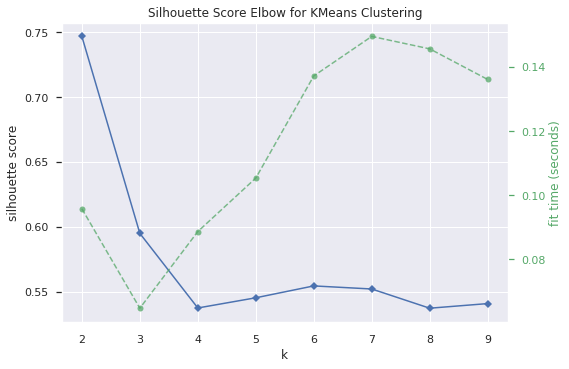

In [439]:
from yellowbrick.cluster import KElbowVisualizer

model1= KMeans(random_state=0)

visualizer1= KElbowVisualizer(model, k=(2,10), metric='silhouette', timings= True)

visualizer1.fit(X1)
visualizer1.poof()

In [443]:
kmeans1= KMeans(random_state=0, n_clusters=2).fit(X1)

In [444]:
print(silhouette_score(X1, kmeans1.labels_))

0.7468045609665879


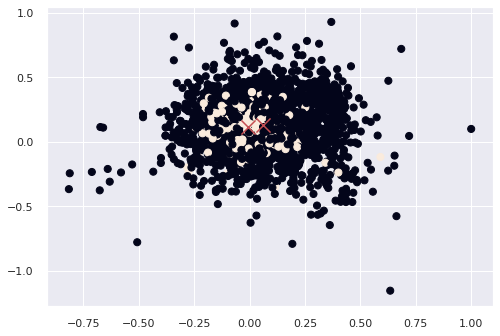

In [454]:
plt.scatter(X1[:,2], X1[:,50], s=50, c= kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,2], kmeans1.cluster_centers_[:,50], c="r", marker= "x", s=200)

plt.show()

In [456]:
X= list_combine.values
X=np.nan_to_num(X)
X



array([[ 9.5151520e+01, -8.8325270e-02, -3.7939390e-01,  5.1515000e+01],
       [ 4.0000000e+01, -2.3757370e-01, -2.9852941e-01,  1.1765000e+01],
       [ 2.7037040e+01, -1.1714810e-01, -3.7962960e-02,  1.1111000e+01],
       ...,
       [ 5.8000000e+01, -5.5433650e-02,  1.6300000e-01,  2.0000000e+01],
       [ 5.8880600e+01,  5.0353020e-02,  4.0298510e-03,  2.0149000e+01],
       [ 6.2442750e+01, -1.2456330e-01, -7.6335880e-03,  2.0611000e+01]])

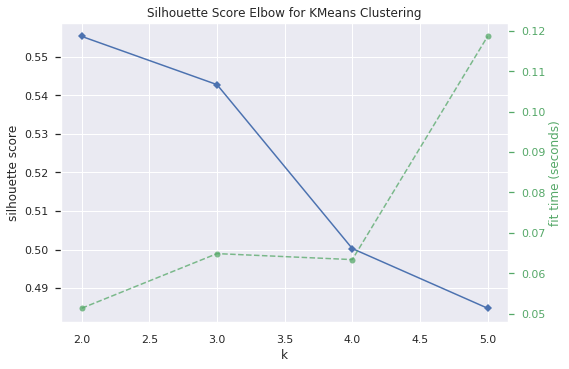

In [457]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=True)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 

# 0.5448807259711906


In [458]:
kmeans= KMeans(n_clusters= 2, random_state=0).fit(X)

In [459]:
print(silhouette_score(X, kmeans.labels_))

0.5552301802960237


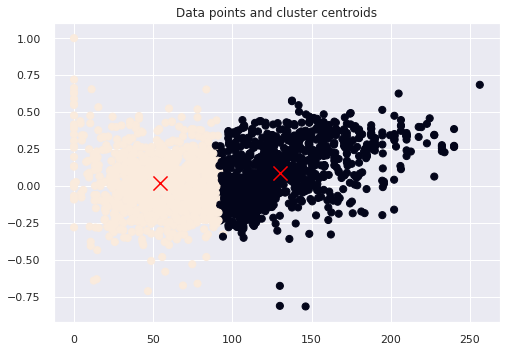

In [460]:
# Plotting the cluster centers and the data points on a 2D plane
# plt.scatter(X1[:, 0], X1[:, -1])

plt.scatter(X[:, 0], X[:, 1], s=50, c=kmeans.labels_)
# plt.scatter(8.93967041, 1.47855804, s=200, c="g", marker="s")
# plt.scatter(11.56783791, 1.21359448, s=200, c="g", marker="s")
# plt.scatter(12.70067177, 6.21857627, s=200, c="g", marker="s")
# plt.scatter(4.72203181, 1.47418604, s=200, c="g", marker="s")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
    
plt.title('Data points and cluster centroids')
plt.show()

In [285]:
X1= apd3_list.values
X1=np.nan_to_num(X)
X1

array([[10.50297  ,  0.2318182],
       [10.96502  ,  1.198235 ],
       [ 8.213678 ,  1.954444 ],
       ...,
       [ 3.980071 ,  2.075    ],
       [ 8.970834 ,  2.208284 ],
       [ 9.708402 ,  2.513893 ]])

In [286]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X1)

In [287]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 5.23046362  0.35862196]
 [11.33969315  2.43274019]
 [10.21201696 -0.40739815]
 [ 8.53888828  1.42800844]]
[2 1 3 ... 0 3 3]


In [288]:
print(silhouette_score(X1, kmeans.labels_))

0.414841701872192


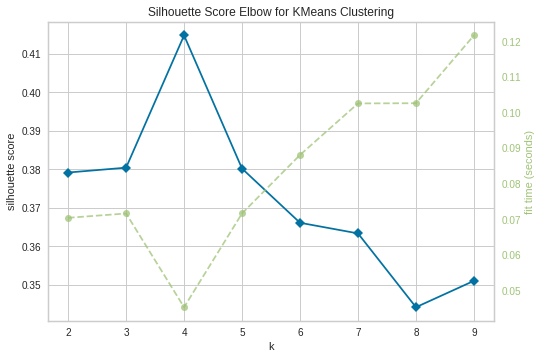

In [292]:
model= KMeans(random_state=0)
visualizer= KElbowVisualizer(model, k=(2,10), metric= "silhouette", timing= True)

visualizer.fit(apd3_list)
visualizer.poof()

In [ ]:
labels2= {0: "r", 1: "g", 2: "b", 3: "y"}
label_colormap2= []

In [307]:

#importing the dataset
dataset = pd.read_csv('/home/anjali/06/datasets/features.csv')

cols= [item for item in list(dataset.keys()) if item not in ("Unnamed: 0", "seq")]

#creating a duplicate dataset to work on
dataset1 = dataset[cols]

# peeking at the dataset
dataset1.head().T
print(type(dataset1))
#Descriptive stats of the variables in data
dataset1.describe()



<class 'pandas.core.frame.DataFrame'>


,aindex,autocovariance,autocorrelation,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,column_NonPolar_number,column_NonPolar_percentage,column_Polar_number,column_Polar_percentage,column_Charged_number,column_Charged_percentage,column_Basic_number,column_Basic_percentage,column_Acidic_number,column_Acidic_percentage
count,15642.000000,15418.000000,15418.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,...,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000,15642.000000
mean,86.951677,0.057319,0.050803,0.043609,-0.244329,-0.032130,-0.019797,0.088218,0.124368,0.119793,...,28.879555,59.192894,20.963176,40.669021,11.331863,24.026137,7.375719,17.553337,3.956144,6.472811
std,42.277843,0.238445,0.222679,0.258590,0.241761,0.255905,0.193594,0.208152,0.186996,0.169243,...,31.778366,12.178963,23.537529,12.192179,11.574672,11.360038,6.537811,10.656634,5.836617,6.706530
min,0.000000,-1.840501,-1.164822,-1.104000,-1.015000,-0.870000,-1.333636,-0.990000,-1.346667,-1.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.666670,-0.082085,-0.084584,-0.098000,-0.390350,-0.199028,-0.102400,-0.031000,0.018327,0.023218,...,12.000000,52.083000,7.000000,33.333000,4.000000,16.438000,3.000000,10.811000,0.000000,0.000000
50%,83.888890,0.041689,0.042446,0.070000,-0.271542,-0.041500,-0.005049,0.065000,0.143039,0.114082,...,18.000000,59.091000,12.000000,40.773000,7.000000,22.951000,5.000000,15.789000,2.000000,5.263000
75%,110.000000,0.179797,0.177372,0.189036,-0.143750,0.137727,0.091818,0.191613,0.250247,0.217674,...,31.000000,66.667000,23.000000,47.826000,14.000000,30.769000,10.000000,21.739000,5.000000,9.649000
max,260.000000,1.370184,1.000000,1.550000,1.545000,1.468000,0.886250,1.121111,1.060000,1.018214,...,176.000000,100.000000,138.000000,100.000000,106.000000,100.000000,55.000000,100.000000,51.000000,100.000000


In [304]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(dataset1)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

In [308]:
dataset1_standardized= dataset1_standardized.values
dataset1_standardized=np.nan_to_num(dataset1_standardized)


In [312]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
dataset1['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster


,aindex,autocovariance,autocorrelation,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,column_NonPolar_number,column_NonPolar_percentage,column_Polar_number,column_Polar_percentage,column_Charged_number,column_Charged_percentage,column_Basic_number,column_Basic_percentage,column_Acidic_number,column_Acidic_percentage
cluster,,,,,,,,,,,,,,,,,,,,,
1,128.7,0.2,0.1,-0.1,-0.4,-0.1,-0.0,-0.0,0.2,0.2,...,17.5,69.4,8.2,30.5,4.8,17.8,3.9,14.8,0.9,3.0
2,84.4,0.0,0.0,0.2,-0.2,-0.2,-0.0,0.0,0.1,-0.0,...,25.6,50.1,24.0,49.7,14.3,29.6,8.2,16.4,6.1,13.2
3,72.3,0.0,-0.0,0.1,-0.3,0.1,0.0,-0.0,0.1,0.1,...,120.2,57.4,87.5,42.6,40.2,20.1,21.3,10.6,18.9,9.4
4,54.9,0.0,0.0,0.1,-0.2,0.2,0.1,0.2,0.0,0.1,...,23.3,61.6,14.9,38.3,7.4,19.2,5.8,15.3,1.6,3.9
5,72.7,0.0,0.0,0.1,0.0,-0.3,-0.3,0.3,0.1,0.2,...,10.6,51.2,10.3,48.6,8.4,40.2,7.6,37.3,0.8,2.9


In [472]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer= load_breast_cancer()

print(cancer.data)
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
# random_state=1)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
